In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! unzip gdrive/MyDrive/10foods.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: foodvn/Banh mi/298.jpg  
  inflating: foodvn/Banh mi/299.jpg  
  inflating: foodvn/Banh mi/3.jpg    
  inflating: foodvn/Banh mi/30.jpg   
  inflating: foodvn/Banh mi/303.jpg  
  inflating: foodvn/Banh mi/304.jpg  
  inflating: foodvn/Banh mi/306.jpg  
  inflating: foodvn/Banh mi/307.jpg  
  inflating: foodvn/Banh mi/308.jpg  
  inflating: foodvn/Banh mi/31.jpg   
  inflating: foodvn/Banh mi/310.jpg  
  inflating: foodvn/Banh mi/311.jpg  
  inflating: foodvn/Banh mi/313.jpg  
  inflating: foodvn/Banh mi/315.jpg  
  inflating: foodvn/Banh mi/317.jpg  
  inflating: foodvn/Banh mi/318.jpg  
  inflating: foodvn/Banh mi/319.jpg  
  inflating: foodvn/Banh mi/32.jpg   
  inflating: foodvn/Banh mi/321.jpg  
  inflating: foodvn/Banh mi/322.jpg  
  inflating: foodvn/Banh mi/323.jpg  
  inflating: foodvn/Banh mi/324.jpg  
  inflating: foodvn/Banh mi/325.jpg  
  inflating: foodvn/Banh mi/327.jpg  
  inflating: foodvn/Banh mi/328

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras import layers


In [ ]:
from pathlib import Path
train=Path('foodvn/')

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(train,
                                                     batch_size=10, 
                                                     image_size=(100,100),
                                                     validation_split=0.2,
                                                     seed=123,
                                                     subset='training'
                                                     )


Found 6629 files belonging to 10 classes.
Using 5304 files for training.


In [ ]:
val_ds=tf.keras.utils.image_dataset_from_directory(train,
                                                   batch_size=10,
                                                   image_size=(100,100),
                                                   validation_split=0.2,
                                                   seed=123,
                                                   subset='validation'
                                                   )
                                                     

Found 6629 files belonging to 10 classes.
Using 1325 files for validation.


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(100,100,3)))
model.add(layers.Conv2D(8,3, strides=(1,1), padding='same', activation='relu'))
model.add(layers.Dropout(0.35))
model.add(layers.Conv2D(16,3,strides=(1,1), padding='same', activation='relu'))
model.add(layers.Dropout(0.35))
model.add(layers.Conv2D(32,3,strides=(1,1), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(layers.Dropout(0.35))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.add(layers.Softmax())
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 100, 100, 8)       224       
                                                                 
 dropout_52 (Dropout)        (None, 100, 100, 8)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 100, 100, 16)      1168      
                                                                 
 dropout_53 (Dropout)        (None, 100, 100, 16)      0         
                                                                 
 conv2d_49 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                     

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [ ]:
model.fit(train_ds, epochs=50,validation_data=val_ds)

Epoch 1/50
531/531 [==============================] - 66s 124ms/step - loss: 2.2740 - accuracy: 0.1491 - val_loss: 2.2628 - val_accuracy: 0.1698
Epoch 2/50
531/531 [==============================] - 66s 122ms/step - loss: 2.2711 - accuracy: 0.1440 - val_loss: 2.2561 - val_accuracy: 0.1585
Epoch 3/50
531/531 [==============================] - 62s 115ms/step - loss: 2.2654 - accuracy: 0.1569 - val_loss: 2.2418 - val_accuracy: 0.1608
Epoch 4/50
531/531 [==============================] - 62s 116ms/step - loss: 2.2495 - accuracy: 0.1604 - val_loss: 2.2306 - val_accuracy: 0.1600
Epoch 5/50
531/531 [==============================] - 62s 116ms/step - loss: 2.2429 - accuracy: 0.1655 - val_loss: 2.2301 - val_accuracy: 0.1570
Epoch 6/50
531/531 [==============================] - 62s 116ms/step - loss: 2.2288 - accuracy: 0.1667 - val_loss: 2.2280 - val_accuracy: 0.1615
Epoch 7/50
531/531 [==============================] - 63s 117ms/step - loss: 2.2029 - accuracy: 0.1817 - val_loss: 2.2303 - val_ac

In [ ]:
model.evaluate(train_ds)

531/531 [==============================] - 47s 87ms/step - loss: 0.4079 - accuracy: 0.8954


[0.4079417586326599, 0.8953620195388794]

In [ ]:
label={0:'banh cuon',1:'banh gio ',2:'banh mi',3:'banh pia',4:'bun bo hue',5:'bun rieu',6:'ca kho to',7:'chao long',8:'com tam ',9:'nem chua'}


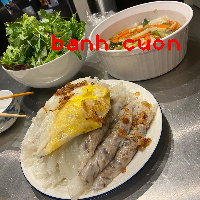

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow
frame = cv.imread('/content/Banh cuon/1005.jpg', cv.IMREAD_COLOR)
roi1 = cv.resize(frame,(100,100))#resize ảnh
roi=  np.expand_dims(roi1, 0) #đưa ảnh về (1,128,128,3)
result = model.predict(roi)
score = tf.nn.softmax(result[0])
text=format(label[np.argmax(score)])
frames=cv.resize(frame,(200,200))
cv.putText(frames, text,(50,50),cv.FONT_HERSHEY_PLAIN  ,1.5,(0,0,255),2) 
cv2_imshow(frames) 



In [ ]:
frame = cv.imread('/content/Bun rieu/1087.jpg', cv.IMREAD_COLOR)
roi1 = cv.resize(frame,(100,100))#resize ảnh
roi=  np.expand_dims(roi1, 0) #đưa ảnh về (1,128,128,3)
result = model.predict(roi)
score = tf.nn.softmax(result[0])
text=format(label[np.argmax(score)])
frames=cv.resize(frame,(200,200))
cv.putText(frames, text,(50,50),cv.FONT_HERSHEY_PLAIN  ,1.5,(0,0,255),2) 
cv2_imshow(frames) 
